In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df=pd.read_csv("Electric_Vehicle_Data.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181458 entries, 0 to 181457
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         181458 non-null  object 
 1   County                                             181455 non-null  object 
 2   City                                               181455 non-null  object 
 3   State                                              181458 non-null  object 
 4   Postal Code                                        181455 non-null  float64
 5   Model Year                                         181458 non-null  int64  
 6   Make                                               181458 non-null  object 
 7   Model                                              181458 non-null  object 
 8   Electric Vehicle Type                              181458 non-null  object

In [25]:
df.shape[0]

181458

In [26]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 398
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

 ### Handling Missing Values

In [27]:
# Object type--This type column values are replaced by Unknow type
df['County'].fillna("Unknown",inplace=True)
df['City'].fillna("Unknown",inplace=True)
df['Vehicle Location'].fillna("Unknown",inplace=True)
df['Electric Utility'].fillna("Unknown",inplace=True)

In [28]:
# Handling int and Float types
df.loc[df['Postal Code'].isnull(),:]   = df['Postal Code'].mode()[0]
df.loc[df['Legislative District'].isnull(),:]   = df['Legislative District'].mode()[0]
df.loc[df['2020 Census Tract'].isnull(),:]   = df['2020 Census Tract'].mode()[0]


In [29]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

### Data Visulizations

In [30]:
#  Finding the top modles by their value
df["Make"].value_counts()

Make
TESLA                   80627
NISSAN                  14024
CHEVROLET               13839
FORD                     9503
BMW                      7666
KIA                      7633
TOYOTA                   6486
VOLKSWAGEN               5153
JEEP                     4679
HYUNDAI                  4553
RIVIAN                   4419
VOLVO                    4278
AUDI                     3729
CHRYSLER                 3039
MERCEDES-BENZ            1646
PORSCHE                  1157
MITSUBISHI                979
MINI                      925
POLESTAR                  894
SUBARU                    837
HONDA                     834
FIAT                      783
DODGE                     607
MAZDA                     506
CADILLAC                  432
LEXUS                     398
41.0                      395
SMART                     269
LINCOLN                   269
LUCID                     238
JAGUAR                    236
GENESIS                   189
FISKER                    111
LAND 

In [38]:
top_10_companies=df["Make"].value_counts()
# top_10_companies.head(10)

top_models=pd.DataFrame(top_10_companies)
top_models.reset_index(inplace=True)
top_models = top_models.rename(columns={'count': 'Count'})
top_final=top_models.head(10)
top_final

,Make,Count
0,TESLA,80627
1,NISSAN,14024
2,CHEVROLET,13839
3,FORD,9503
4,BMW,7666
5,KIA,7633
6,TOYOTA,6486
7,VOLKSWAGEN,5153
8,JEEP,4679
9,HYUNDAI,4553


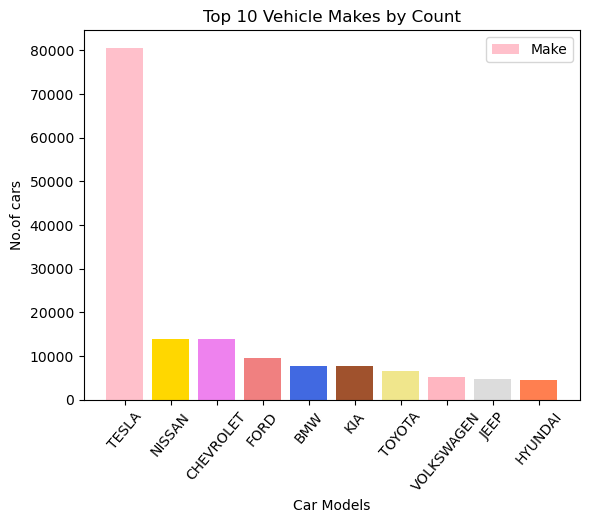

<Figure size 640x480 with 0 Axes>

In [39]:
fig, ax = plt.subplots()
colors = ['pink','gold','violet','lightcoral','royalblue','sienna','khaki','lightpink','gainsboro','coral']
# plt.figure(figsize=(12, 5))
ax.bar(top_final["Make"],top_final["Count"],color=colors)
ax.set_xlabel("Car Models")
ax.set_ylabel('No.of cars')
ax.set_title('Top 10 Vehicle Makes by Count')
ax.legend(['Make'])
ax.set_xticks(range(0,10))
ax.set_xticklabels(top_final["Make"],rotation=50)
plt.show()
plt.clf()

plt.show()

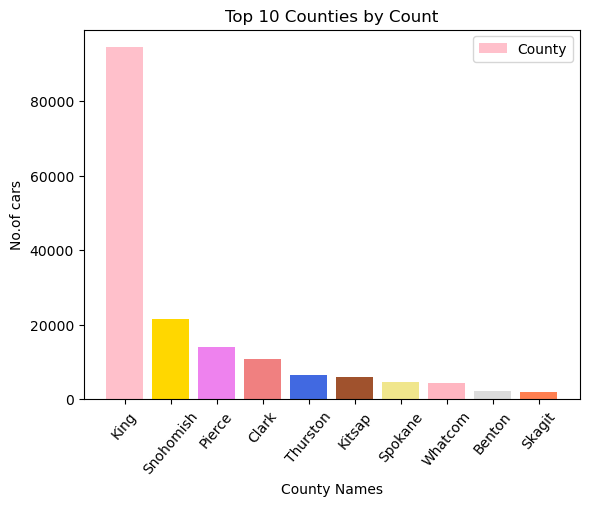

<Figure size 640x480 with 0 Axes>

In [40]:
# Top 10 Counties by count

top_counties=df["County"].value_counts().nlargest(10)
fig, ax = plt.subplots()
colors = ['pink','gold','violet','lightcoral','royalblue','sienna','khaki','lightpink','gainsboro','coral']
# plt.figure(figsize=(12, 5))
ax.bar(top_counties.index,top_counties.values,color=colors)
ax.set_xlabel("County Names")
ax.set_ylabel('No.of cars')
ax.set_title('Top 10 Counties by Count')
ax.legend(['County'])
ax.set_xticks(range(0,10))
ax.set_xticklabels(top_counties.index,rotation=50)
plt.show()
plt.clf()



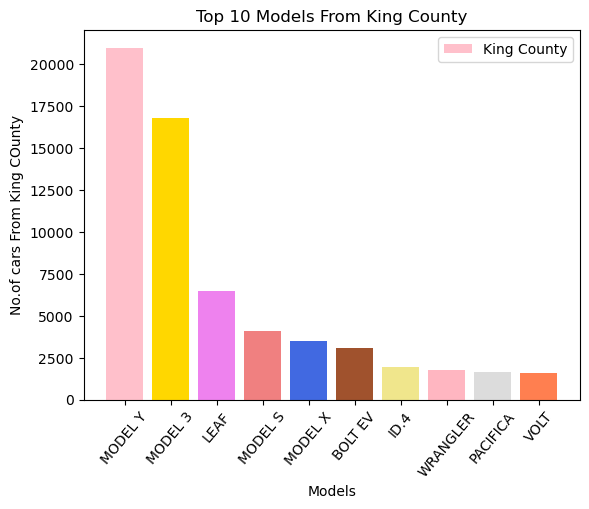

<Figure size 1200x500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [53]:
# From the above plot we can see that KIng County have the top number by owning Electric vehicles.We are checking what kind of manufactureres are high in this county
fig, ax = plt.subplots()
top_10_fromking=df[df["County"]=="King"]
top_10_fromking=top_10_fromking["Model"].value_counts()
top_10_fromking=top_10_fromking.head(10)
# top_10_fromking.index
colors = ['pink','gold','violet','lightcoral','royalblue','sienna','khaki','lightpink','gainsboro','coral']
plt.figure(figsize=(12, 5))
ax.bar(top_10_fromking.index,top_10_fromking.values,color=colors)
ax.set_xlabel("Models")
ax.set_ylabel('No.of cars From King COunty')
ax.set_title('Top 10 Models From King County')
ax.legend(['King County'])
ax.set_xticks(range(0,10))
ax.set_xticklabels(top_10_fromking.index,rotation=50)
plt.show()
plt.clf()

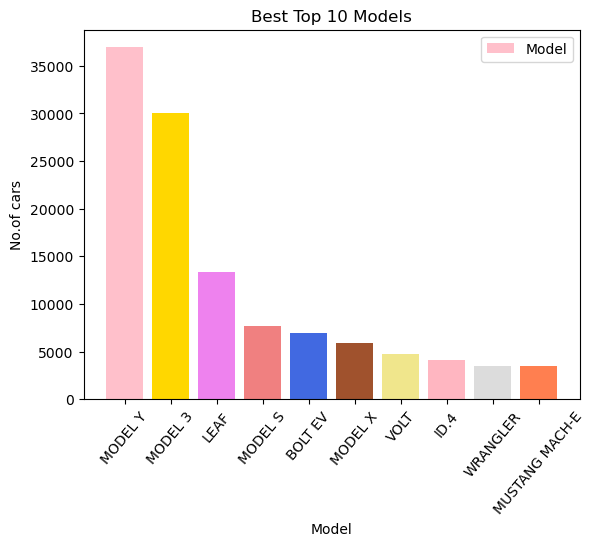

<Figure size 640x480 with 0 Axes>

In [55]:
# Calculate top 10 models by their count
top_10_makes=df["Model"].value_counts().nlargest(10)

fig, ax = plt.subplots()
colors = ['pink','gold','violet','lightcoral','royalblue','sienna','khaki','lightpink','gainsboro','coral']
# plt.figure(figsize=(12, 5))
ax.bar(top_10_makes.index,top_10_makes.values,color=colors)
ax.set_xlabel("Model")
ax.set_ylabel('No.of cars')
ax.set_title('Best Top 10 Models')
ax.legend(['Model'])
ax.set_xticks(range(0,10))
ax.set_xticklabels(top_10_makes.index,rotation=50)
plt.show()
plt.clf()

###  Electric vehicle Distribution by year and type

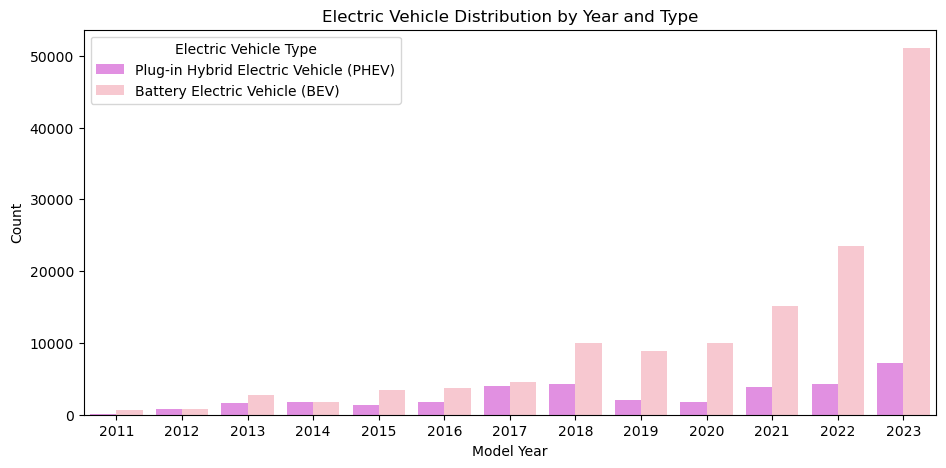

In [43]:
# Filter data for the years 2011 to 2024
import seaborn as sns
df_filtered = df[(df['Model Year'] >= 2011) & (df['Model Year'] <= 2023)]

# Plotting
plt.figure(figsize=(11, 5))
colors=["violet",'pink']
sns.countplot(data=df_filtered, x='Model Year', hue='Electric Vehicle Type', palette=colors)
plt.title('Electric Vehicle Distribution by Year and Type')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.legend(title='Electric Vehicle Type',)
plt.show()